104/104 [==============================] - 0s 2ms/step - loss: 0.0271
Mean Squared Error on Test Set: 0.027121353894472122
104/104 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE) on Test Set: 0.16468560586298958


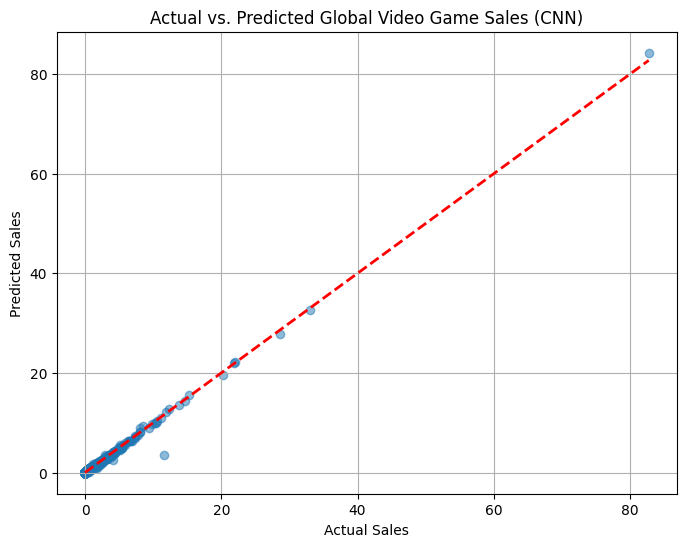

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('/content/vgsales.csv')

# Data preprocessing
# Select features and target variable
X = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Replace with your feature columns
y = data['Global_Sales']  # Replace with your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for CNN (assuming you have a 2D feature dataset)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

# Supporting graph to visualize actual vs. predicted sales figures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Global Video Game Sales (CNN)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


104/104 [==============================] - 0s 2ms/step - loss: 0.0097
Mean Squared Error on Test Set: 0.0097010163590312
104/104 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE) on Test Set: 0.09849375814035387


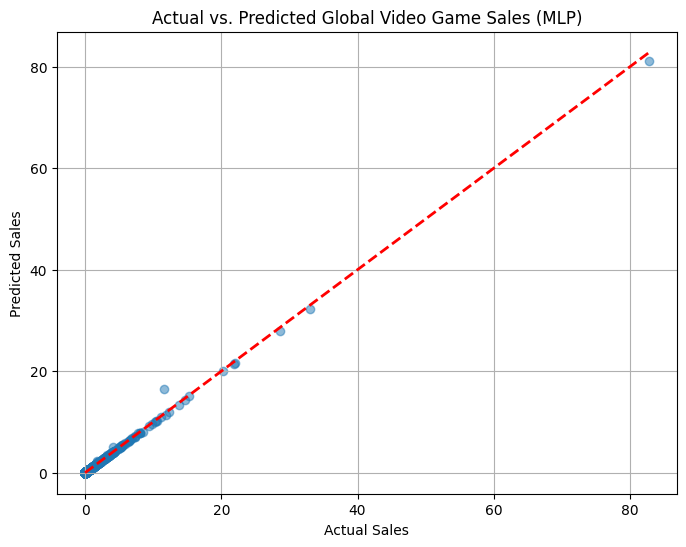

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('/content/vgsales.csv')

# Data preprocessing
# Select features and target variable
X = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Replace with your feature columns
y = data['Global_Sales']  # Replace with your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the MLP model (feedforward neural network)
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

# Supporting graph to visualize actual vs. predicted sales figures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Global Video Game Sales (MLP)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2.78007789203982
RBF Network RMSE: 1.6673565581601975


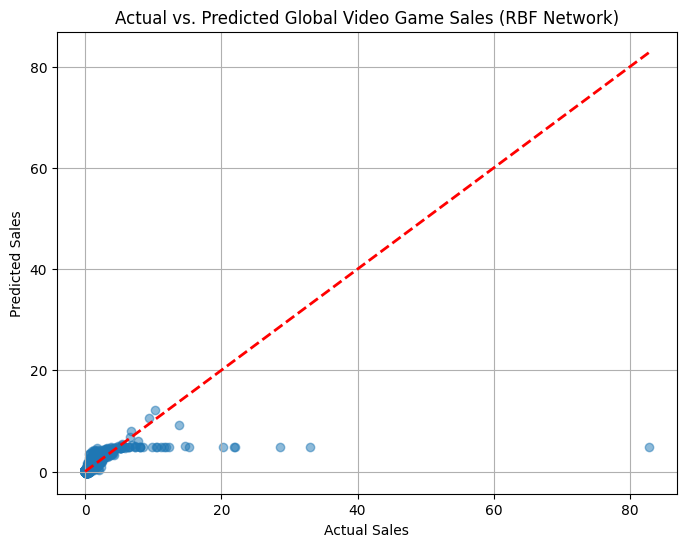

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('/content/vgsales.csv')

# Data preprocessing
# Select features and target variable
X = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Replace with your feature columns
y = data['Global_Sales']  # Replace with your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for RBF networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Determine the number of RBF neurons (you can experiment with this)
n_rbf_neurons = 50

# Create a KMeans clusterer to initialize RBF centers
kmeans = KMeans(n_clusters=n_rbf_neurons, random_state=42)
kmeans.fit(X_train)

# Compute RBF centers and gamma (scale) based on KMeans
rbf_centers = kmeans.cluster_centers_
rbf_gamma = 1.0 / (2 * np.var(X_train))

# Compute RBF activations using the RBF kernel
X_train_rbf = rbf_kernel(X_train, rbf_centers, gamma=rbf_gamma)
X_test_rbf = rbf_kernel(X_test, rbf_centers, gamma=rbf_gamma)

# Create an RBF regression model (MLPRegressor with identity activation function)
rbf_regressor = MLPRegressor(hidden_layer_sizes=(n_rbf_neurons,), activation='identity', max_iter=10000)

# Fit the RBF model
rbf_regressor.fit(X_train_rbf, y_train)

# Predict using the RBF model
y_pred = rbf_regressor.predict(X_test_rbf)

# Calculate the Root Mean Squared Error (RMSE) to evaluate the RBF model
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = np.sqrt(mse)
print(f'RBF Network RMSE: {rmse}')

# Supporting graph to visualize actual vs. predicted sales figures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Global Video Game Sales (RBF Network)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


Epoch 1/10
332/332 [==============================] - 8s 7ms/step - loss: 1.6755 - val_loss: 2.7422
Epoch 2/10
332/332 [==============================] - 2s 6ms/step - loss: 0.5795 - val_loss: 0.7307
Epoch 3/10
332/332 [==============================] - 2s 6ms/step - loss: 0.1721 - val_loss: 0.4531
Epoch 4/10
332/332 [==============================] - 2s 6ms/step - loss: 0.1481 - val_loss: 0.4431
Epoch 5/10
332/332 [==============================] - 3s 8ms/step - loss: 0.0825 - val_loss: 0.3275
Epoch 6/10
332/332 [==============================] - 2s 7ms/step - loss: 0.0608 - val_loss: 0.3508
Epoch 7/10
332/332 [==============================] - 2s 6ms/step - loss: 0.0516 - val_loss: 0.3216
Epoch 8/10
332/332 [==============================] - 2s 6ms/step - loss: 0.0427 - val_loss: 0.3359
Epoch 9/10
332/332 [==============================] - 2s 6ms/step - loss: 0.0589 - val_loss: 0.3462
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 0.1216
Mean Squared Error

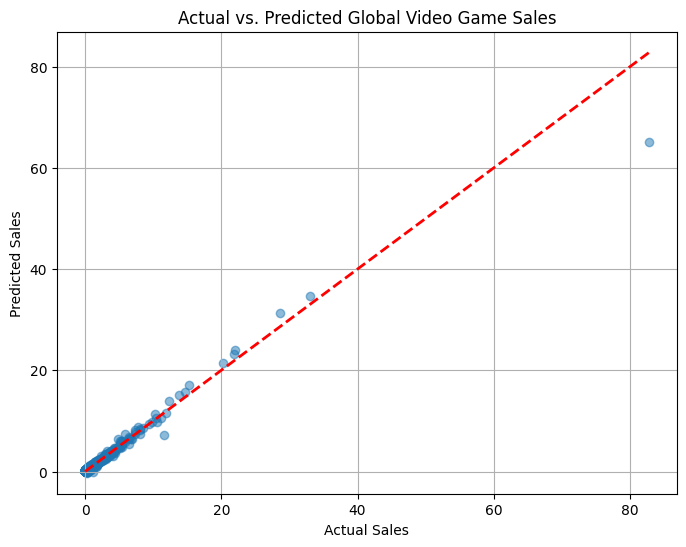

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('/content/vgsales.csv')

# Data preprocessing
# Select features and target variable
X = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Replace with your feature columns
y = data['Global_Sales']  # Replace with your target variable column

# Normalize or standardize features (choose one method)
# scaler = StandardScaler()  # Use this for standardization
scaler = MinMaxScaler()  # Use this for min-max scaling

X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RNN model
model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data for RNN (sequence length, number of features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

# Supporting graph to visualize actual vs. predicted sales figures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Global Video Game Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


104/104 [==============================] - 0s 1ms/step
Ensemble MSE: 0.00011116965099627547
Ensemble RMSE: 0.010543701958812924


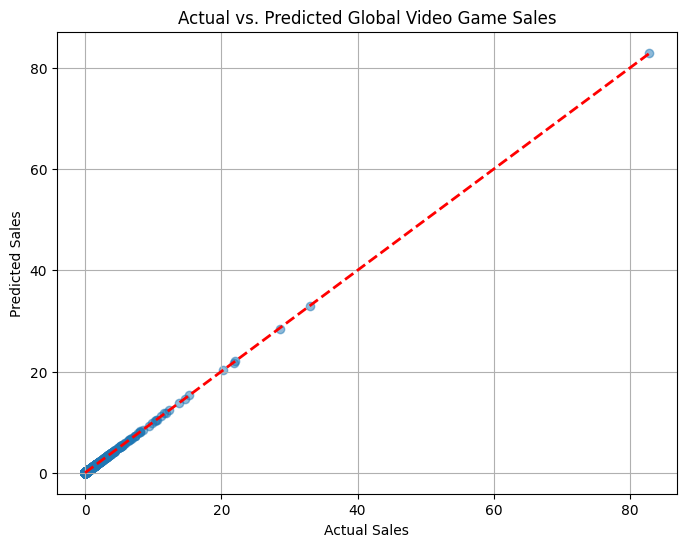

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('/content/vgsales.csv')

# Data preprocessing
# Select features and target variable
X = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # Replace with your feature columns
y = data['Global_Sales']  # Replace with your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base neural network model
def create_base_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create an ensemble of neural network models
num_models = 5  # Adjust the number of models in the ensemble as needed
models = []
for _ in range(num_models):
    model = create_base_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    models.append(model)

# Make predictions using each model
predictions = []
for model in models:
    predictions.append(model.predict(X_test))

# Ensemble predictions (simple averaging)
ensemble_predictions = np.mean(predictions, axis=0)

# Calculate Mean Squared Error (MSE) for the ensemble
mse = mean_squared_error(y_test, ensemble_predictions)
print(f'Ensemble MSE: {mse}')

# Calculate Root Mean Squared Error (RMSE) for the ensemble
rmse = np.sqrt(mse)
print(f'Ensemble RMSE: {rmse}')

# Visualize actual vs. predicted sales figures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ensemble_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Global Video Game Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()
